In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import datetime as dt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
cust_data = pd.read_excel(r"C:\Users\Dell\Downloads\New folder (2)\CustomersData.xlsx")
cust_data.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [4]:
discount_coupon = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Discount_Coupon.csv")
discount_coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [5]:
marketing_spend = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Marketing_Spend.csv")
marketing_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [6]:
online_sales = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Online_Sales.csv")
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [7]:
tax_amt = pd.read_excel(r"C:\Users\Dell\Downloads\New folder (2)\Tax_amount.xlsx")
tax_amt.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [8]:
discount_coupon.columns = discount_coupon.columns.str.replace(' ', '')
discount_coupon

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [9]:
discount_coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [10]:
marketing_spend.head(2)

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36


In [11]:
online_sales['Transaction_Date'] = pd.to_datetime(online_sales.Transaction_Date , format= '%Y%m%d' )
online_sales['Month'] = online_sales['Transaction_Date'].apply(lambda x : pd.Timestamp.strftime(x, format = '%b'))
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan


In [12]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 4.4+ MB


In [13]:
tax_amt.head(2)

,Product_Category,GST
0,Nest-USA,0.1
1,Office,0.1


In [14]:
tax_amt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [15]:

online_sales1 = pd.merge(online_sales , tax_amt , how = 'left',  left_on= 'Product_Category', right_on='Product_Category')
online_sales2 = pd.merge(online_sales1 , cust_data, how = 'left',  left_on= 'CustomerID', right_on='CustomerID')
final_data = pd.merge(online_sales2 , discount_coupon, how = 'left', on= ['Month','Product_Category'])

In [16]:
final_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.10,M,Chicago,12,ELEC10,10.0
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.10,M,Chicago,12,ELEC10,10.0
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,0.10,M,Chicago,12,OFF10,10.0
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,0.18,M,Chicago,12,SALE10,10.0
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,0.18,M,Chicago,12,AIO10,10.0


In [18]:
final_data['Invoice_amt'] = ((final_data.Quantity*final_data.Avg_Price)*((1-final_data.Discount_pct/100))*(1+final_data.GST))+final_data.Delivery_Charges

In [19]:
final_data['Sales_amt'] = ((final_data.Quantity*final_data.Avg_Price)*((1-final_data.Discount_pct/100)))

In [20]:
final_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,Invoice_amt,Sales_amt
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,M,Chicago,12,ELEC10,10.0,158.6729,138.339
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,M,Chicago,12,ELEC10,10.0,158.6729,138.339


In [37]:
cust_month_invoice = final_data.loc[:, ['CustomerID', 'Year_month', 'Sales_amt']] 

In [38]:
cust_month_invoice.drop_duplicates(subset='CustomerID' , inplace= True)

In [39]:
new_cust_rev_monthly = cust_month_invoice.groupby('Year_month')[['Sales_amt']].sum()
new_cust_rev_monthly.head(2)

,Sales_amt
Year_month,
2019-01,16461.378
2019-02,6165.768


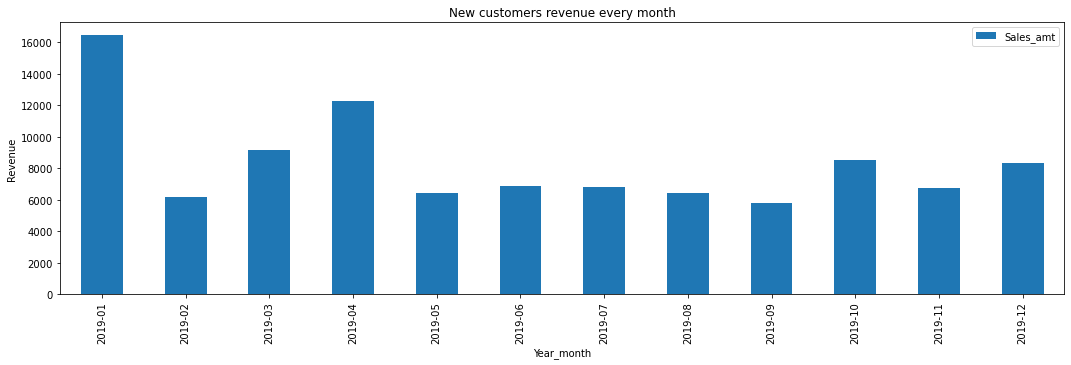

In [40]:
new_cust_rev_monthly.plot( kind = 'bar', figsize = (18,5))
plt.ylabel('Revenue')
plt.title('New customers revenue every month')
plt.show()

In [41]:
final_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,Invoice_amt,Sales_amt,Year_month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,M,Chicago,12,ELEC10,10.0,158.6729,138.339,2019-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,M,Chicago,12,ELEC10,10.0,158.6729,138.339,2019-01


In [42]:
discount_rev = final_data.groupby('Discount_pct')[['Sales_amt']].sum()
discount_rev.head(2)

,Sales_amt
Discount_pct,
10.0,1417943.214
20.0,1216247.296


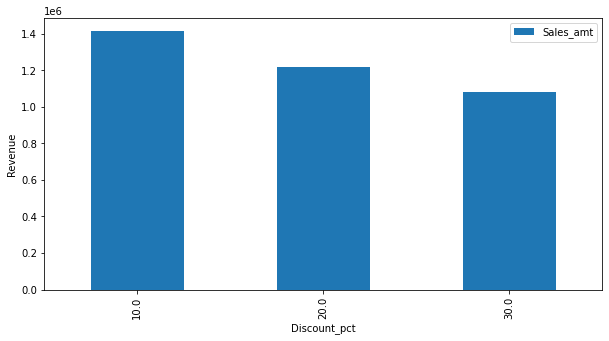

In [43]:
discount_rev.plot( kind = 'bar', figsize = (10,5))
plt.ylabel('Revenue')
plt.show()

In [44]:
cat_qty_sales = final_data.groupby('Year_month').agg({'Quantity':'sum',
                                                       'Sales_amt': 'sum'}).reset_index().rename(columns={'Sales_amt':'sales'})
round(cat_qty_sales,2)

,Year_month,Quantity,sales
0,2019-01,20140,360949.35
1,2019-02,16575,246658.92
2,2019-03,20787,241980.71
3,2019-04,25277,357159.75
4,2019-05,18715,243165.42
5,2019-06,21619,223357.22
6,2019-07,22898,332562.23
7,2019-08,27457,319556.82
8,2019-09,19353,251858.07
9,2019-10,17425,367271.88


In [45]:
marketing_spend.h_spend.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB
marketing_spend['Date'] = pd.to_datetime(marketing_spend.Date , format= '%m/%d/%Y' )
marketing_spend['Year_month'] = marketing_spend.Date.apply(lambda x: pd.Timestamp.strftime(x , format = "%Y-%m"))
marketing_spend['Total_spend'] =
marketing_spend['Total_spend'] = marketing_spend.Offline_Spend + marketing_spend.Online_Spend
marketing_spend.head(2)
Date	Offline_Spend	Online_Spend	Year_month	Total_spend
0	2019-01-01	4500	2424.50	2019-01	6924.50
1	2019-01-02	4500	3480.36	2019-01	7980.36
montly_spend = marketing_spend.groupby('Year_month')['Total_spend'].sum().reset_index()
montly_spend.head(2)
Year_month	Total_spend
0	2019-01	154928.95
1	2019-02	137107.92ead(2)

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36


In [46]:
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [47]:
marketing_spend['Date'] = pd.to_datetime(marketing_spend.Date , format= '%m/%d/%Y' )

In [48]:
marketing_spend['Year_month'] = marketing_spend.Date.apply(lambda x: pd.Timestamp.strftime(x , format = "%Y-%m"))

In [49]:
marketing_spend['Total_spend'] = marketing_spend.Offline_Spend + marketing_spend.Online_Spend

In [50]:
marketing_spend.head(2)

,Date,Offline_Spend,Online_Spend,Year_month,Total_spend
0,2019-01-01,4500,2424.50,2019-01,6924.50
1,2019-01-02,4500,3480.36,2019-01,7980.36


In [51]:
montly_spend = marketing_spend.groupby('Year_month')['Total_spend'].sum().reset_index()
montly_spend.head(2)

,Year_month,Total_spend
0,2019-01,154928.95
1,2019-02,137107.92


In [55]:
montly_rev = final_data.groupby('Year_month')['Sales_amt'].sum().reset_index()
montly_rev.head(2)

,Year_month,Sales_amt
0,2019-01,360949.347
1,2019-02,246658.920


In [56]:
pd.merge(montly_spend, montly_rev, how = 'left', on='Year_month' )

,Year_month,Total_spend,Sales_amt
0,2019-01,154928.95,360949.347
1,2019-02,137107.92,246658.920
2,2019-03,122250.09,241980.711
3,2019-04,157026.83,357159.753
4,2019-05,118259.64,243165.424
5,2019-06,134318.14,223357.225
6,2019-07,120217.85,332562.231
7,2019-08,142904.15,319556.824
8,2019-09,135514.54,251858.068
9,2019-10,151224.65,367271.883


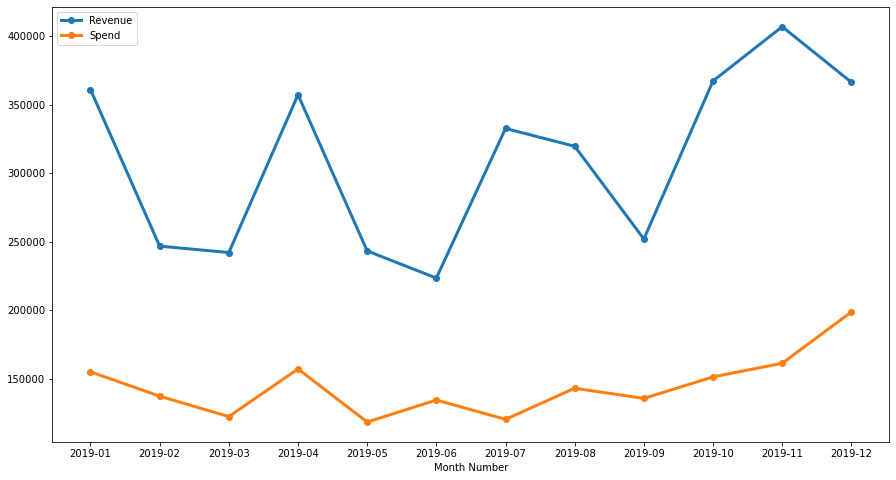

In [58]:
plt.figure(figsize= (15,8))
plt.plot(montly_rev.Year_month, montly_rev.Sales_amt,   label = 'Revenue', marker='o', linewidth=3)
plt.plot(montly_spend.Year_month, montly_spend.Total_spend,   label = 'Spend',  marker='o', linewidth=3)

plt.xlabel('Month Number')
plt.legend(loc='upper left')
plt.show()

In [60]:
prod_qty = final_data.groupby('Product_Category')['Quantity'].sum().reset_index()

In [61]:
prod_qty.sort_values(by='Quantity', ascending=False).head(1)

,Product_Category,Quantity
18,Office,88383


In [62]:
final_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,Invoice_amt,Sales_amt,Year_month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,M,Chicago,12,ELEC10,10.0,158.6729,138.339,2019-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,M,Chicago,12,ELEC10,10.0,158.6729,138.339,2019-01


In [64]:
date = dt.datetime(2020, 2, 20)

In [65]:
cust_mf = final_data.groupby('CustomerID').agg({'Transaction_ID':'count',
                                                'Sales_amt':'sum'}).reset_index().rename(columns={'Transaction_ID': 'frequency', 'Sales_amt': 'monetary'})
cust_mf

,CustomerID,frequency,monetary
0,12346,2,21.693
1,12347,60,9930.649
2,12348,23,1142.502
3,12350,17,952.049
4,12356,36,1009.729
...,...,...,...
1463,18259,7,474.075
1464,18260,40,1753.041
1465,18269,8,88.466
1466,18277,1,268.200


In [66]:
cust_recency = final_data.loc[:,['CustomerID','Transaction_Date']]

In [67]:
cust_recency = cust_recency.drop_duplicates(subset='CustomerID', keep='last')

In [68]:
cust_recency['recency'] = (date - cust_recency.Transaction_Date).dt.days

In [69]:
seg_df = pd.merge(cust_recency, cust_mf, how= 'right', on= 'CustomerID')

In [70]:
seg_df.drop(columns='Transaction_Date', inplace=True)
seg_df.head()

,CustomerID,recency,frequency,monetary
0,12346,158,2,21.693
1,12347,110,60,9930.649
2,12348,124,23,1142.502
3,12350,68,17,952.049
4,12356,158,36,1009.729


In [71]:
seg_df['decile'] = pd.qcut(seg_df['monetary'], 10, labels=False)

In [72]:
seg_df.head()

,CustomerID,recency,frequency,monetary,decile
0,12346,158,2,21.693,0
1,12347,110,60,9930.649,9
2,12348,124,23,1142.502,4
3,12350,68,17,952.049,3
4,12356,158,36,1009.729,4


In [73]:
seg_df.decile.value_counts()

0    148
9    147
4    147
2    147
8    147
5    147
7    147
3    146
1    146
6    146
Name: decile, dtype: int64

In [76]:
col_kpi=['monetary','recency','frequency']

In [77]:
VB_Profiling=seg_df.groupby(['decile']).apply(lambda x: x[col_kpi].mean())

In [78]:
VB_Profiling.T

decile,0,1,2,3,4,5,6,7,8,9
monetary,51.723115,259.098123,523.656578,796.238459,1168.956190,1627.954803,2234.213151,3140.033150,4689.324469,10821.081374
recency,236.310811,218.863014,216.435374,205.753425,209.000000,197.965986,176.417808,174.503401,177.911565,139.585034
frequency,3.000000,7.787671,11.687075,14.801370,19.802721,24.931973,33.602740,46.013605,64.707483,134.054422


In [79]:
profiling_output = VB_Profiling.T

In [80]:
profiling_output

decile,0,1,2,3,4,5,6,7,8,9
monetary,51.723115,259.098123,523.656578,796.238459,1168.956190,1627.954803,2234.213151,3140.033150,4689.324469,10821.081374
recency,236.310811,218.863014,216.435374,205.753425,209.000000,197.965986,176.417808,174.503401,177.911565,139.585034
frequency,3.000000,7.787671,11.687075,14.801370,19.802721,24.931973,33.602740,46.013605,64.707483,134.054422


In [81]:
quantiles = seg_df[['frequency','monetary','recency' ]].quantile(q=[0.25,0.5,0.75])
quantiles

,frequency,monetary,recency
0.25,10.0,509.48475,106.0
0.50,21.0,1406.88100,182.0
0.75,46.0,3142.38125,271.0


In [82]:
quantiles = quantiles.to_dict()
quantiles

{'frequency': {0.25: 10.0, 0.5: 21.0, 0.75: 46.0},
 'monetary': {0.25: 509.48474999999996, 0.5: 1406.881, 0.75: 3142.38125},
 'recency': {0.25: 106.0, 0.5: 182.0, 0.75: 271.0}}

In [83]:
#We create two classes for the RFM segmentation since, being high recency is bad, while high frequency and monetary value is good.
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [84]:
seg_df['R_Quartile'] = seg_df['recency'].apply(RClass, args=('recency',quantiles,))
seg_df['F_Quartile'] = seg_df['frequency'].apply(FMClass, args=('frequency',quantiles,))
seg_df['M_Quartile'] = seg_df['monetary'].apply(FMClass, args=('monetary',quantiles,))

In [85]:
seg_df.head()

,CustomerID,recency,frequency,monetary,decile,R_Quartile,F_Quartile,M_Quartile
0,12346,158,2,21.693,0,2,4,4
1,12347,110,60,9930.649,9,2,1,1
2,12348,124,23,1142.502,4,2,2,3
3,12350,68,17,952.049,3,1,3,3
4,12356,158,36,1009.729,4,2,2,3


In [86]:
seg_df1=seg_df.assign(R_seg=np.nan, FM_seg =np.nan)
seg_df1.R_seg[seg_df['R_Quartile']==4] = "3_Churn"
seg_df1.R_seg[seg_df['R_Quartile']==2] = "2_At_Risk"
seg_df1.R_seg[seg_df['R_Quartile']==3] = "2_At_Risk"
seg_df1.R_seg[seg_df['R_Quartile']==1] = "1_Active"

seg_df1.FM_seg[(seg_df['F_Quartile']==3) & (seg_df['M_Quartile']==1)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==4) & (seg_df['M_Quartile']==1)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==2) & (seg_df['M_Quartile']==2)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==2) & (seg_df['M_Quartile']==1)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==3) & (seg_df['M_Quartile']==2)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==4) & (seg_df['M_Quartile']==2)] = "1_Silver"
seg_df1.FM_seg[(seg_df['F_Quartile']==1) & (seg_df['M_Quartile']==3)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==2) & (seg_df['M_Quartile']==3)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==3) & (seg_df['M_Quartile']==3)] = "1_Silver"
seg_df1.FM_seg[(seg_df['F_Quartile']==4) & (seg_df['M_Quartile']==3)] = "1_Silver"
seg_df1.FM_seg[(seg_df['F_Quartile']==1) & (seg_df['M_Quartile']==4)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==1) & (seg_df['M_Quartile']==2)] = "2_Gold"
seg_df1.FM_seg[(seg_df['F_Quartile']==2) & (seg_df['M_Quartile']==4)] = "1_Silver"
seg_df1.FM_seg[(seg_df['F_Quartile']==3) & (seg_df['M_Quartile']==4)] = "1_Silver"
seg_df1.FM_seg[(seg_df['F_Quartile']==4) & (seg_df['M_Quartile']==4)] = "0_Standard"

seg_df1.FM_seg.fillna("4_Premium", inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4552\2120361335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_df1.R_seg[seg_df['R_Quartile']==4] = "3_Churn"
C:\Users\Dell\AppData\Local\Temp\ipykernel_4552\2120361335.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_df1.FM_seg[(seg_df['F_Quartile']==3) & (seg_df['M_Quartile']==1)] = "2_Gold"


In [87]:
seg_df1.head(5)

,CustomerID,recency,frequency,monetary,decile,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg
0,12346,158,2,21.693,0,2,4,4,2_At_Risk,0_Standard
1,12347,110,60,9930.649,9,2,1,1,2_At_Risk,4_Premium
2,12348,124,23,1142.502,4,2,2,3,2_At_Risk,2_Gold
3,12350,68,17,952.049,3,1,3,3,1_Active,1_Silver
4,12356,158,36,1009.729,4,2,2,3,2_At_Risk,2_Gold


In [88]:
col_kpi=['monetary','recency','frequency']

In [89]:
Profiling=seg_df1.groupby(['R_seg', 'FM_seg']).apply(lambda x: x[col_kpi].mean()).T

In [90]:
Profiling

R_seg        1_Active                                         2_At_Risk  \
FM_seg     0_Standard    1_Silver       2_Gold    4_Premium  0_Standard   
monetary   242.059257  826.715143  2393.159021  9088.011212  172.849157   
recency     72.457143   74.528571    78.020548    77.016949  191.444444   
frequency    4.371429   12.928571    30.041096   115.491525    4.601307   

R_seg                                               3_Churn              \
FM_seg       1_Silver       2_Gold    4_Premium  0_Standard    1_Silver   
monetary   760.850944  2190.131802  6561.446391  168.305390  812.445667   
recency    187.635897   181.988095   169.360902  339.047619  339.419048   
frequency   13.415385    34.793651    97.466165    3.552381   12.819048   

R_seg                                
FM_seg          2_Gold    4_Premium  
monetary   2162.754414  6379.922956  
recency     334.837838   350.777778  
frequency    31.387387    79.955556

In [91]:
seg_df1[((seg_df1.R_seg =="3.Churn") & (seg_df1.FM_seg =="4.Premium")) ]

,CustomerID,recency,frequency,monetary,decile,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg


In [92]:
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA  

In [93]:
seg_df2 = seg_df.loc[:,['recency','frequency','monetary']]
seg_df2.head() 

,recency,frequency,monetary
0,158,2,21.693
1,110,60,9930.649
2,124,23,1142.502
3,68,17,952.049
4,158,36,1009.729


In [94]:
#standardize the data

sc = StandardScaler()
sc = sc.fit(seg_df2)
seg_df2_std = pd.DataFrame(sc.transform(seg_df2), columns = seg_df2.columns)
seg_df2_std.head(2)

,recency,frequency,monetary
0,-0.365961,-0.669410,-0.614642
1,-0.837001,0.470788,1.811083


In [97]:
#KMeans Clustering   input: standardized data, number of cluster
km_3 = KMeans(n_clusters=3, random_state=123).fit(seg_df2)
km_4 = KMeans(n_clusters=4, random_state=123).fit(seg_df2)
km_5 = KMeans(n_clusters=5, random_state=123).fit(seg_df2)
km_6 = KMeans(n_clusters=6, random_state=123).fit(seg_df2)
km_7 = KMeans(n_clusters=7, random_state=123).fit(seg_df2)
km_8 = KMeans(n_clusters=8, random_state=123).fit(seg_df2)

In [98]:
seg_df2_std['Cluster_3'] = km_3.labels_
seg_df2_std['Cluster_4'] = km_4.labels_
seg_df2_std['Cluster_5'] = km_5.labels_
seg_df2_std['Cluster_6'] = km_6.labels_
seg_df2_std['Cluster_7'] = km_7.labels_
seg_df2_std['Cluster_8'] = km_8.labels_

In [99]:
print('km_3 =',silhouette_score(seg_df2_std, km_3.labels_))
print('km_4 =',silhouette_score(seg_df2_std, km_4.labels_))
print('km_5 =',silhouette_score(seg_df2_std, km_5.labels_))
print('km_6 =',silhouette_score(seg_df2_std, km_6.labels_))
print('km_7 =',silhouette_score(seg_df2_std, km_7.labels_))
print('km_8 =',silhouette_score(seg_df2_std, km_8.labels_))

km_3 = 0.31076275807483067
km_4 = 0.4183660688428527
km_5 = 0.49351451829567067
km_6 = 0.4974214791711459
km_7 = 0.5907688630577379
km_8 = 0.5826935306060386


In [100]:
predect_seg = pd.DataFrame(seg_df2_std.Cluster_4 ).rename(columns={'Cluster_4':'Pred_seg'})
predect_seg

,Pred_seg
0,1
1,0
2,1
3,1
4,1
...,...
1463,1
1464,1
1465,1
1466,1


In [101]:
seg_kmeans = pd.concat([seg_df, predect_seg], axis=1)
seg_kmeans.drop(columns = ['decile','R_Quartile','F_Quartile','M_Quartile'], axis=1,inplace = True)

In [102]:
seg_kmeans

,CustomerID,recency,frequency,monetary,Pred_seg
0,12346,158,2,21.693,1
1,12347,110,60,9930.649,0
2,12348,124,23,1142.502,1
3,12350,68,17,952.049,1
4,12356,158,36,1009.729,1
...,...,...,...,...,...
1463,18259,321,7,474.075,1
1464,18260,138,40,1753.041,1
1465,18269,245,8,88.466,1
1466,18277,120,1,268.200,1


In [104]:
#KMeans Clustering   input: standardized data, number of cluster
km_3 = KMeans(n_clusters=3, random_state=123).fit(seg_df2)
km_4 = KMeans(n_clusters=4, random_state=123).fit(seg_df2)
km_5 = KMeans(n_clusters=5, random_state=123).fit(seg_df2)
km_6 = KMeans(n_clusters=6, random_state=123).fit(seg_df2)
km_7 = KMeans(n_clusters=7, random_state=123).fit(seg_df2)
km_8 = KMeans(n_clusters=8, random_state=123).fit(seg_df2)

In [105]:
seg_df2_std['Cluster_3'] = km_3.labels_
seg_df2_std['Cluster_4'] = km_4.labels_
seg_df2_std['Cluster_5'] = km_5.labels_
seg_df2_std['Cluster_6'] = km_6.labels_
seg_df2_std['Cluster_7'] = km_7.labels_
seg_df2_std['Cluster_8'] = km_8.labels_

In [106]:
print('km_3 =',silhouette_score(seg_df2_std, km_3.labels_))
print('km_4 =',silhouette_score(seg_df2_std, km_4.labels_))
print('km_5 =',silhouette_score(seg_df2_std, km_5.labels_))
print('km_6 =',silhouette_score(seg_df2_std, km_6.labels_))
print('km_7 =',silhouette_score(seg_df2_std, km_7.labels_))
print('km_8 =',silhouette_score(seg_df2_std, km_8.labels_))

km_3 = 0.31076275807483067
km_4 = 0.4183660688428527
km_5 = 0.49351451829567067
km_6 = 0.4974214791711459
km_7 = 0.5907688630577379
km_8 = 0.5826935306060386


In [107]:
predect_seg = pd.DataFrame(seg_df2_std.Cluster_4 ).rename(columns={'Cluster_4':'Pred_seg'})
predect_seg

,Pred_seg
0,1
1,0
2,1
3,1
4,1
...,...
1463,1
1464,1
1465,1
1466,1


In [108]:
cust_month = final_data[['CustomerID','Transaction_Date']]

In [109]:
cust_month1 = cust_month.groupby('CustomerID')['Transaction_Date'].min().reset_index()
cust_month2 = cust_month.groupby('CustomerID')['Transaction_Date'].max().reset_index()

In [110]:
cust_month3 = pd.merge(cust_month1, cust_month2, on='CustomerID' ,how= 'left')

In [111]:
cust_month3['days_diff'] = (cust_month3.Transaction_Date_y- cust_month3.Transaction_Date_x).dt.days

In [112]:
# Average Customer Lifespan 

ACL = cust_month3.days_diff.mean()/ cust_month3.CustomerID.count()
ACL

0.04384127508556749

In [114]:
cust_data.head(2)

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43


In [115]:

seg_df1.head(2)

,CustomerID,recency,frequency,monetary,decile,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg
0,12346,158,2,21.693,0,2,4,4,2_At_Risk,0_Standard
1,12347,110,60,9930.649,9,2,1,1,2_At_Risk,4_Premium


In [116]:
cust_rev = seg_df1

In [117]:
cust_rev.rename(columns={'monetary': 'Revenue'}, inplace=True)

In [118]:
# CLTV is customer lifetime value
cust_rev['CLTV'] = cust_rev.Revenue * ACL

In [119]:
def lifetime_value (x):
    if x.CLTV < 50 :
        return 2
    elif x.CLTV < 200:
        return 1
    else :
        return 0
    
# High value = 1
# Medium value = 2
# Low value = 3

In [120]:
cust_rev['CLTV'] = cust_rev.apply(lifetime_value, axis=1)

In [121]:
cust_rev

,CustomerID,recency,frequency,Revenue,decile,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg,CLTV
0,12346,158,2,21.693,0,2,4,4,2_At_Risk,0_Standard,2
1,12347,110,60,9930.649,9,2,1,1,2_At_Risk,4_Premium,0
2,12348,124,23,1142.502,4,2,2,3,2_At_Risk,2_Gold,1
3,12350,68,17,952.049,3,1,3,3,1_Active,1_Silver,2
4,12356,158,36,1009.729,4,2,2,3,2_At_Risk,2_Gold,2
...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,321,7,474.075,2,4,4,4,3_Churn,0_Standard,2
1464,18260,138,40,1753.041,5,2,2,2,2_At_Risk,2_Gold,1
1465,18269,245,8,88.466,0,3,4,4,2_At_Risk,0_Standard,2
1466,18277,120,1,268.200,1,2,4,4,2_At_Risk,0_Standard,2


In [122]:
cust_rev.CLTV.value_counts()

2    649
1    587
0    232
Name: CLTV, dtype: int64

In [123]:
cust_data_new = pd.merge(cust_data,cust_rev, how='left' ,on='CustomerID')
cust_data_new

,CustomerID,Gender,Location,Tenure_Months,recency,frequency,Revenue,decile,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg,CLTV
0,17850,M,Chicago,12,390,297,30964.878,9,4,1,1,3_Churn,4_Premium,0
1,13047,M,California,43,64,44,2321.227,6,1,2,2,1_Active,2_Gold,1
2,12583,M,Chicago,33,202,42,1971.352,6,3,2,2,2_At_Risk,2_Gold,1
3,13748,F,California,30,415,1,1.116,0,4,4,4,3_Churn,0_Standard,2
4,15100,M,California,49,174,6,762.752,3,2,4,3,2_At_Risk,1_Silver,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,14438,F,New York,41,51,9,354.816,1,1,4,4,1_Active,0_Standard,2
1464,12956,F,Chicago,48,51,19,2101.407,6,1,3,2,1_Active,2_Gold,1
1465,15781,M,New Jersey,19,51,5,514.703,2,1,4,3,1_Active,1_Silver,2
1466,14410,F,New York,45,51,8,776.293,3,1,4,3,1_Active,1_Silver,2


In [124]:
# Creating dummie variables
cust_data_new = pd.get_dummies(cust_data_new, columns=['Location'], drop_first=True, prefix='Location')
cust_data_new = pd.get_dummies(cust_data_new, columns=['Gender'], drop_first=True, prefix='Gender')
cust_data_new = pd.get_dummies(cust_data_new, columns=['R_seg'], drop_first=True, prefix='R_seg')
cust_data_new = pd.get_dummies(cust_data_new, columns=['FM_seg'], drop_first=True, prefix='FM_seg')

In [125]:
cust_data_new.head(2)

,CustomerID,Tenure_Months,recency,frequency,Revenue,decile,R_Quartile,F_Quartile,M_Quartile,CLTV,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Gender_M,R_seg_2_At_Risk,R_seg_3_Churn,FM_seg_1_Silver,FM_seg_2_Gold,FM_seg_4_Premium
0,17850,12,390,297,30964.878,9,4,1,1,0,1,0,0,0,1,0,1,0,0,1
1,13047,43,64,44,2321.227,6,1,2,2,1,0,0,0,0,1,0,0,0,1,0


In [127]:
pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [128]:
from imblearn.over_sampling import SMOTE

In [129]:
x = cust_data_new.loc[:,cust_data_new.columns.difference(['CLTV'])]
y = cust_data_new.CLTV

In [130]:
#balancing the data
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(x, y)

In [131]:
resampled_y.value_counts()

0    649
1    649
2    649
Name: CLTV, dtype: int64

In [132]:
cust_data_new2 = pd.concat([resampled_X, resampled_y], axis=1)

In [133]:
cust_data_new2.head(2)

,CustomerID,FM_seg_1_Silver,FM_seg_2_Gold,FM_seg_4_Premium,F_Quartile,Gender_M,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,M_Quartile,R_Quartile,R_seg_2_At_Risk,R_seg_3_Churn,Revenue,Tenure_Months,decile,frequency,recency,CLTV
0,17850,0,0,1,1,1,1,0,0,0,1,4,0,1,30964.878,12,9,297,390,0
1,13047,0,1,0,2,1,0,0,0,0,2,1,0,0,2321.227,43,6,44,64,1


In [134]:
cust_data_new2.rename(columns={'Location_New Jersey':'Location_New_Jersey',
                               'Location_New York':'Location_New_York',
                               'Location_Washington DC':'Location_Washington_DC'},inplace=True)

In [135]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [136]:
# splitting the data: separate out the feature/input/independant columns and dependant variable
feature_columns = cust_data_new2.columns.difference(['CLTV','CustomerID'])
feature_columns

Index(['FM_seg_1_Silver', 'FM_seg_2_Gold', 'FM_seg_4_Premium', 'F_Quartile',
       'Gender_M', 'Location_Chicago', 'Location_New_Jersey',
       'Location_New_York', 'Location_Washington_DC', 'M_Quartile',
       'R_Quartile', 'R_seg_2_At_Risk', 'R_seg_3_Churn', 'Revenue',
       'Tenure_Months', 'decile', 'frequency', 'recency'],
      dtype='object')

In [137]:
# seperate the X and y columns
features = cust_data_new2[feature_columns]
target = cust_data_new2.CLTV

# do the f_regression
F_values, p_values  = f_regression( features, target )

In [138]:
# combine the output in dataframe
F_regression_op = pd.DataFrame([feature_columns, F_values.round(2), p_values.round(4)]).T

# add the column names
F_regression_op.columns = ['Features', 'F_values', 'p_values' ]
F_regression_op

,Features,F_values,p_values
0,FM_seg_1_Silver,594.45,0.0
1,FM_seg_2_Gold,5.22,0.0224
2,FM_seg_4_Premium,2839.74,0.0
3,F_Quartile,5268.41,0.0
4,Gender_M,14.84,0.0001
5,Location_Chicago,28.41,0.0
6,Location_New_Jersey,28.39,0.0
7,Location_New_York,26.67,0.0
8,Location_Washington_DC,2.96,0.0856
9,M_Quartile,9105.93,0.0


In [139]:
feature_columns = list( F_regression_op.loc[ F_regression_op.p_values <= 0.1, 'Features' ] )

In [140]:
print('No. of feature = ' ,len(feature_columns))
print(feature_columns)

No. of feature =  17
['FM_seg_1_Silver', 'FM_seg_2_Gold', 'FM_seg_4_Premium', 'F_Quartile', 'Gender_M', 'Location_Chicago', 'Location_New_Jersey', 'Location_New_York', 'Location_Washington_DC', 'M_Quartile', 'R_Quartile', 'R_seg_2_At_Risk', 'R_seg_3_Churn', 'Revenue', 'decile', 'frequency', 'recency']


In [141]:
# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [142]:
model_param = 'CLTV ~ ' + ' + '.join(feature_columns)
model_param

'CLTV ~ FM_seg_1_Silver + FM_seg_2_Gold + FM_seg_4_Premium + F_Quartile + Gender_M + Location_Chicago + Location_New_Jersey + Location_New_York + Location_Washington_DC + M_Quartile + R_Quartile + R_seg_2_At_Risk + R_seg_3_Churn + Revenue + decile + frequency + recency'

In [143]:
# separate the Y and X variables
y, X = dmatrices( model_param, cust_data_new2, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif.round(1)

,Features,VIF Factor
0,Intercept,336.2
1,FM_seg_1_Silver,1.8
2,FM_seg_2_Gold,3.6
3,FM_seg_4_Premium,7.4
4,F_Quartile,7.4
5,Gender_M,1.0
6,Location_Chicago,1.3
7,Location_New_Jersey,1.1
8,Location_New_York,1.2
9,Location_Washington_DC,1.1


In [144]:
#Selecting the feature columns with vif <= 5
feature_columns = list( vif.loc[ vif['VIF Factor'] <= 5, 'Features' ] )
print('No. of feature_columns = ', len(feature_columns))
feature_columns

No. of feature_columns =  8


['FM_seg_1_Silver',
 'FM_seg_2_Gold',
 'Gender_M',
 'Location_Chicago',
 'Location_New_Jersey',
 'Location_New_York',
 'Location_Washington_DC',
 'R_seg_2_At_Risk']

In [145]:
#importing package
from sklearn.model_selection import train_test_split

#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(cust_data_new2[feature_columns],cust_data_new2.CLTV, test_size=0.3, random_state=111)

In [148]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [149]:
param_grid = {'max_depth': np.arange(2, 50),
             'max_features': np.arange(4,100)}
data_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3,n_jobs=-1, verbose=True)
data_tree.fit(train_x,train_y)

Fitting 3 folds for each of 4608 candidates, totalling 13824 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
13104 fits failed out of a total of 13824.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13104 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be i

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=True)

In [150]:
print('Best parameters : ',data_tree.best_params_)
print('Accuracy : ' ,data_tree.best_score_)

Best parameters :  {'max_depth': 7, 'max_features': 5}
Accuracy :  0.7209985315712188


In [151]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,data_tree.predict(train_x)))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       444
           1       0.87      0.73      0.79       468
           2       0.65      0.66      0.66       450

    accuracy                           0.73      1362
   macro avg       0.74      0.73      0.73      1362
weighted avg       0.74      0.73      0.74      1362



In [152]:
print(metrics.classification_report(test_y,data_tree.predict(test_x)))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       205
           1       0.89      0.77      0.82       181
           2       0.70      0.68      0.69       199

    accuracy                           0.76       585
   macro avg       0.77      0.76      0.76       585
weighted avg       0.76      0.76      0.76       585



In [153]:
import xgboost

In [154]:
pargrid_xg = {'n_estimators': [60,70,80,90,100],
               'max_depth':[2,3,4,5,6,7,8,9,10]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBClassifier(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1, verbose=1)

data_xg=gscv_xg.fit(train_x, train_y)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


In [155]:
print('Best score : ' ,gscv_xg.best_params_)
print('Accuracy : ', gscv_xg.best_score_)

Best score :  {'max_depth': 5, 'n_estimators': 100}
Accuracy :  0.7254038179148311


In [156]:
print(metrics.classification_report(train_y,data_tree.predict(train_x)))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       444
           1       0.87      0.73      0.79       468
           2       0.65      0.66      0.66       450

    accuracy                           0.73      1362
   macro avg       0.74      0.73      0.73      1362
weighted avg       0.74      0.73      0.74      1362



In [157]:
print(metrics.classification_report(test_y,gscv_xg.predict(test_x)))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       205
           1       0.89      0.77      0.82       181
           2       0.71      0.69      0.70       199

    accuracy                           0.76       585
   macro avg       0.77      0.76      0.77       585
weighted avg       0.77      0.76      0.76       585



In [158]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [159]:
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan


In [160]:
online_sales.Product_Description.value_counts()

Nest Learning Thermostat 3rd Gen-USA - Stainless Steel         3511
Nest Cam Outdoor Security Camera - USA                         3328
Nest Cam Indoor Security Camera - USA                          3230
Google Sunglasses                                              1523
Nest Protect Smoke + CO White Battery Alarm-USA                1361
                                                               ... 
Google Tee Red                                                    2
Google Women's Colorblock Tee White                               1
Compact Journal with Recycled Pages                               1
Android Women's Short Sleeve Tri-blend Badge Tee Light Blue       1
Google Large Standard Journal Grey                                1
Name: Product_Description, Length: 404, dtype: int64

In [161]:
online_sales['Product_Description'] = online_sales['Product_Description'].str.strip()

In [162]:
basket =online_sales.groupby(['CustomerID', 'Product_Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerID')

In [163]:
basket.head()

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1   

In [165]:
basket_sets = basket.applymap(encode_units)

In [166]:
basket_sets.head(2)

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [167]:
frequent_itemsets = apriori(basket_sets, min_support=0.2, use_colnames=True)

C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [168]:
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
8,0.649183,(Nest Cam Indoor Security Camera - USA)
10,0.648501,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
9,0.647139,(Nest Cam Outdoor Security Camera - USA)
33,0.539510,"(Nest Cam Outdoor Security Camera - USA, Nest ..."
34,0.525204,"(Nest Cam Indoor Security Camera - USA, Nest L..."
...,...,...
4,0.202997,(Google Men's Vintage Badge Tee Black)
30,0.202316,"(Google Twill Cap, Nest Cam Indoor Security Ca..."
74,0.201635,"(Nest Cam Outdoor Security Camera - USA, Googl..."
31,0.201635,"(Google Twill Cap, Nest Cam Outdoor Security C..."


In [169]:
rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Google 22 oz Water Bottle),(Nest Cam Indoor Security Camera - USA),0.306540,0.649183,0.246594,0.804444,1.239165,0.047594,1.793953
1,(Google 22 oz Water Bottle),(Nest Cam Outdoor Security Camera - USA),0.306540,0.647139,0.243869,0.795556,1.229343,0.045496,1.725951
2,(Google 22 oz Water Bottle),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.306540,0.648501,0.251362,0.820000,1.264454,0.052571,1.952770
3,(Google Laptop and Cell Phone Stickers),(Nest Cam Indoor Security Camera - USA),0.346730,0.649183,0.290191,0.836935,1.289214,0.065100,2.151399
4,(Google Laptop and Cell Phone Stickers),(Nest Cam Outdoor Security Camera - USA),0.346730,0.647139,0.279973,0.807466,1.247747,0.055590,1.832717
...,...,...,...,...,...,...,...,...,...
245,(Nest Protect Smoke + CO White Battery Alarm-U...,"(Nest Cam Indoor Security Camera - USA, Nest C...",0.371935,0.305177,0.206403,0.554945,1.818436,0.092897,1.561207
246,"(Nest Cam Indoor Security Camera - USA, Nest P...","(Nest Cam Outdoor Security Camera - USA, Nest ...",0.339918,0.329019,0.206403,0.607214,1.845530,0.094564,1.708263
247,(Nest Protect Smoke + CO White Battery Alarm-U...,"(Nest Cam Outdoor Security Camera - USA, Nest ...",0.247275,0.462534,0.206403,0.834711,1.804647,0.092030,3.251669
248,"(Nest Cam Indoor Security Camera - USA, Nest P...","(Nest Cam Outdoor Security Camera - USA, Nest ...",0.361035,0.301771,0.206403,0.571698,1.894476,0.097453,1.630226


In [170]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nest Cam Indoor Security Camera - USA),(Google 22 oz Water Bottle),0.649183,0.306540,0.246594,0.379853,1.239165,0.047594,1.118220
1,(Google 22 oz Water Bottle),(Nest Cam Indoor Security Camera - USA),0.306540,0.649183,0.246594,0.804444,1.239165,0.047594,1.793953
2,(Nest Cam Outdoor Security Camera - USA),(Google 22 oz Water Bottle),0.647139,0.306540,0.243869,0.376842,1.229343,0.045496,1.112817
3,(Google 22 oz Water Bottle),(Nest Cam Outdoor Security Camera - USA),0.306540,0.647139,0.243869,0.795556,1.229343,0.045496,1.725951
4,(Google 22 oz Water Bottle),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.306540,0.648501,0.251362,0.820000,1.264454,0.052571,1.952770
...,...,...,...,...,...,...,...,...,...
365,(Nest Cam Outdoor Security Camera - USA),(Nest Protect Smoke + CO White Battery Alarm-U...,0.647139,0.217984,0.206403,0.318947,1.463171,0.065338,1.148247
366,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,"(Nest Cam Indoor Security Camera - USA, Nest C...",0.648501,0.215940,0.206403,0.318277,1.473915,0.066366,1.150116
367,(Nest Protect Smoke + CO White Wired Alarm-USA),(Nest Protect Smoke + CO White Battery Alarm-U...,0.386240,0.303815,0.206403,0.534392,1.758939,0.089058,1.495216
368,(Nest Cam Indoor Security Camera - USA),(Nest Protect Smoke + CO White Battery Alarm-U...,0.649183,0.212534,0.206403,0.317943,1.495964,0.068430,1.154546


In [171]:
rules.sort_values(by='confidence', ascending=False )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
341,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Cam Indoor Security Camera - USA),0.212534,0.649183,0.206403,0.971154,1.495964,0.068430,12.161671
301,"(Nest Cam Outdoor Security Camera - USA, Nest ...",(Nest Cam Indoor Security Camera - USA),0.222752,0.649183,0.215940,0.969419,1.493292,0.071333,11.471730
343,"(Nest Cam Indoor Security Camera - USA, Nest C...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.215940,0.648501,0.206403,0.955836,1.473915,0.066366,7.958933
328,"(Nest Cam Outdoor Security Camera - USA, Nest ...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.222752,0.648501,0.212534,0.954128,1.471282,0.068079,7.662670
315,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Cam Indoor Security Camera - USA),0.229564,0.649183,0.217984,0.949555,1.462693,0.068955,6.954440
...,...,...,...,...,...,...,...,...,...
29,(Nest Cam Outdoor Security Camera - USA),(Google Twill Cap),0.647139,0.247956,0.201635,0.311579,1.256588,0.041173,1.092418
224,(Nest Cam Outdoor Security Camera - USA),"(Nest Cam Indoor Security Camera - USA, Google...",0.647139,0.220027,0.201635,0.311579,1.416093,0.059247,1.132988
226,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,"(Nest Cam Outdoor Security Camera - USA, Googl...",0.648501,0.218665,0.201635,0.310924,1.421922,0.059830,1.133889
57,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,(Nest Thermostat E - USA),0.648501,0.229564,0.201635,0.310924,1.354412,0.052762,1.118072


In [172]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.9) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
82,"(Google Laptop and Cell Phone Stickers, Nest C...",(Nest Cam Indoor Security Camera - USA),0.279973,0.649183,0.254087,0.907543,1.397977,0.072334,3.794368
89,"(Google Laptop and Cell Phone Stickers, Nest L...",(Nest Cam Indoor Security Camera - USA),0.280654,0.649183,0.254768,0.907767,1.398323,0.072573,3.803600
100,"(Nest Cam Outdoor Security Camera - USA, Googl...",(Nest Cam Indoor Security Camera - USA),0.272480,0.649183,0.247956,0.910000,1.401763,0.071067,3.897972
102,"(Nest Cam Indoor Security Camera - USA, Google...",(Nest Cam Outdoor Security Camera - USA),0.274523,0.647139,0.247956,0.903226,1.395722,0.070302,3.646231
112,"(Nest Cam Outdoor Security Camera - USA, Googl...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.272480,0.648501,0.247275,0.907500,1.399380,0.070572,3.799985
124,"(Nest Learning Thermostat 3rd Gen-USA - White,...",(Nest Cam Indoor Security Camera - USA),0.309264,0.649183,0.279973,0.905286,1.394502,0.079204,3.703979
132,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Cam Outdoor Security Camera - USA),0.361035,0.647139,0.329700,0.913208,1.411146,0.096060,4.065573
138,"(Nest Cam Outdoor Security Camera - USA, Nest ...",(Nest Cam Indoor Security Camera - USA),0.327657,0.649183,0.305177,0.931393,1.434716,0.092468,5.113430
149,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.361035,0.648501,0.326975,0.905660,1.396544,0.092844,3.725886
155,"(Nest Cam Indoor Security Camera - USA, Nest P...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.339918,0.648501,0.309946,0.911824,1.406047,0.089508,3.986314


In [173]:
cust_month3.head(2)

,CustomerID,Transaction_Date_x,Transaction_Date_y,days_diff
0,12346,2019-09-15,2019-09-15,0
1,12347,2019-03-24,2019-11-02,223


In [174]:
cust_next_purchased = cust_month3
cust_next_purchased = cust_next_purchased.rename(columns={'days_diff':'next_purchased'} )
cust_next_purchased.head()

,CustomerID,Transaction_Date_x,Transaction_Date_y,next_purchased
0,12346,2019-09-15,2019-09-15,0
1,12347,2019-03-24,2019-11-02,223
2,12348,2019-06-22,2019-10-19,119
3,12350,2019-12-14,2019-12-14,0
4,12356,2019-09-15,2019-09-15,0


In [175]:
cust_next_purchased =  cust_next_purchased.groupby('CustomerID')['next_purchased'].mean().reset_index()
cust_next_purchased


,CustomerID,next_purchased
0,12346,0.0
1,12347,223.0
2,12348,119.0
3,12350,0.0
4,12356,0.0
...,...,...
1463,18259,0.0
1464,18260,105.0
1465,18269,76.0
1466,18277,0.0


In [176]:
def purchased_day (x):
    if x.next_purchased <= 30 :   # Purchased days btw 0-30 = 0
        return 0                        
    elif x.next_purchased <= 60:  # Purchased days btw 30-60 = 1
        return 1                     
    elif x.next_purchased <= 90:  # Purchased days btw 60-90 = 2
        return 2
    else :                        # Purchased days of 90+ = 3
        return 3

In [177]:
cust_next_purchased['next_purchased'] = cust_next_purchased.apply(purchased_day, axis=1)

In [178]:
cust_next_purchased.head()

,CustomerID,next_purchased
0,12346,0
1,12347,3
2,12348,3
3,12350,0
4,12356,0


In [179]:

cust_next_purchased = pd.merge(cust_next_purchased, seg_df1 , on='CustomerID' , how='left')
cust_next_purchased = pd.merge(cust_data, cust_next_purchased, on='CustomerID', how= 'left' )
cust_next_purchased.head()

,CustomerID,Gender,Location,Tenure_Months,next_purchased,recency,frequency,Revenue,decile,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg,CLTV
0,17850,M,Chicago,12,0,390,297,30964.878,9,4,1,1,3_Churn,4_Premium,0
1,13047,M,California,43,3,64,44,2321.227,6,1,2,2,1_Active,2_Gold,1
2,12583,M,Chicago,33,3,202,42,1971.352,6,3,2,2,2_At_Risk,2_Gold,1
3,13748,F,California,30,0,415,1,1.116,0,4,4,4,3_Churn,0_Standard,2
4,15100,M,California,49,3,174,6,762.752,3,2,4,3,2_At_Risk,1_Silver,2


In [180]:
# Creating dummie variables
cust_next_purchased = pd.get_dummies(cust_next_purchased, columns=['R_seg'], drop_first=True, prefix='R_seg')
cust_next_purchased = pd.get_dummies(cust_next_purchased, columns=['FM_seg'], drop_first=True, prefix='FM_seg')
cust_next_purchased = pd.get_dummies(cust_next_purchased, columns=['Location'], drop_first=True, prefix='Location')
cust_next_purchased = pd.get_dummies(cust_next_purchased, columns=['Gender'], drop_first=True, prefix='Gender')

In [181]:
cust_next_purchased.head()

,CustomerID,Tenure_Months,next_purchased,recency,frequency,Revenue,decile,R_Quartile,F_Quartile,M_Quartile,...,R_seg_2_At_Risk,R_seg_3_Churn,FM_seg_1_Silver,FM_seg_2_Gold,FM_seg_4_Premium,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Gender_M
0,17850,12,0,390,297,30964.878,9,4,1,1,...,0,1,0,0,1,1,0,0,0,1
1,13047,43,3,64,44,2321.227,6,1,2,2,...,0,0,0,1,0,0,0,0,0,1
2,12583,33,3,202,42,1971.352,6,3,2,2,...,1,0,0,1,0,1,0,0,0,1
3,13748,30,0,415,1,1.116,0,4,4,4,...,0,1,0,0,0,0,0,0,0,0
4,15100,49,3,174,6,762.752,3,2,4,3,...,1,0,1,0,0,0,0,0,0,1


In [182]:
cust_next_purchased.rename(columns={'Location_New Jersey':'Location_New_Jersey',
                               'Location_New York':'Location_New_York',
                               'Location_Washington DC':'Location_Washington_DC'},inplace=True)

In [183]:
cust_next_purchased.next_purchased.value_counts()

0    926
3    426
2     65
1     51
Name: next_purchased, dtype: int64

In [184]:
x = cust_next_purchased.loc[:,cust_next_purchased.columns.difference(['next_purchased'])]
y = cust_next_purchased.next_purchased

In [185]:
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(x, y)

In [186]:
cust_next_purchased = pd.concat([resampled_X,resampled_y], axis=1)

In [187]:
cust_next_purchased.next_purchased.value_counts()

0    926
3    926
1    926
2    926
Name: next_purchased, dtype: int64

In [188]:
cust_next_purchased.columns.difference(['next_purchased'])

Index(['CLTV', 'CustomerID', 'FM_seg_1_Silver', 'FM_seg_2_Gold',
       'FM_seg_4_Premium', 'F_Quartile', 'Gender_M', 'Location_Chicago',
       'Location_New_Jersey', 'Location_New_York', 'Location_Washington_DC',
       'M_Quartile', 'R_Quartile', 'R_seg_2_At_Risk', 'R_seg_3_Churn',
       'Revenue', 'Tenure_Months', 'decile', 'frequency', 'recency'],
      dtype='object')

In [189]:
feature_columns = cust_next_purchased.columns.difference(['next_purchased','CustomerID'])
feature_columns

Index(['CLTV', 'FM_seg_1_Silver', 'FM_seg_2_Gold', 'FM_seg_4_Premium',
       'F_Quartile', 'Gender_M', 'Location_Chicago', 'Location_New_Jersey',
       'Location_New_York', 'Location_Washington_DC', 'M_Quartile',
       'R_Quartile', 'R_seg_2_At_Risk', 'R_seg_3_Churn', 'Revenue',
       'Tenure_Months', 'decile', 'frequency', 'recency'],
      dtype='object')

In [190]:
# seperate the X and y columns
features = cust_next_purchased[feature_columns]
target = cust_next_purchased.next_purchased

# do the f_regression
F_values, p_values  = f_regression( features, target )

In [191]:
# combine the output in dataframe
F_regression_op = pd.DataFrame([feature_columns, F_values.round(2), p_values.round(4)]).T

# add the column names
F_regression_op.columns = ['Features', 'F_values', 'p_values' ]
F_regression_op

,Features,F_values,p_values
0,CLTV,466.68,0.0
1,FM_seg_1_Silver,138.17,0.0
2,FM_seg_2_Gold,4.59,0.0321
3,FM_seg_4_Premium,402.43,0.0
4,F_Quartile,755.84,0.0
5,Gender_M,11.88,0.0006
6,Location_Chicago,41.22,0.0
7,Location_New_Jersey,19.13,0.0
8,Location_New_York,36.83,0.0
9,Location_Washington_DC,1.13,0.2886


In [192]:
feature_columns = list( F_regression_op.loc[ F_regression_op.p_values <= 0.1, 'Features' ] )

In [193]:
print('No. of feature = ' ,len(feature_columns))
print(feature_columns)

No. of feature =  17
['CLTV', 'FM_seg_1_Silver', 'FM_seg_2_Gold', 'FM_seg_4_Premium', 'F_Quartile', 'Gender_M', 'Location_Chicago', 'Location_New_Jersey', 'Location_New_York', 'M_Quartile', 'R_Quartile', 'R_seg_3_Churn', 'Revenue', 'Tenure_Months', 'decile', 'frequency', 'recency']


In [194]:
from sklearn.feature_selection import f_regression

In [195]:
model_param = 'next_purchased ~ ' + ' + '.join(feature_columns)
model_param

'next_purchased ~ CLTV + FM_seg_1_Silver + FM_seg_2_Gold + FM_seg_4_Premium + F_Quartile + Gender_M + Location_Chicago + Location_New_Jersey + Location_New_York + M_Quartile + R_Quartile + R_seg_3_Churn + Revenue + Tenure_Months + decile + frequency + recency'

In [196]:
# separate the Y and X variables
y, X = dmatrices( model_param, cust_next_purchased, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif.round(1)

,Features,VIF Factor
0,Intercept,242.2
1,CLTV,5.7
2,FM_seg_1_Silver,1.5
3,FM_seg_2_Gold,2.4
4,FM_seg_4_Premium,3.9
5,F_Quartile,4.5
6,Gender_M,1.1
7,Location_Chicago,1.1
8,Location_New_Jersey,1.1
9,Location_New_York,1.1


In [197]:
features = list( vif.loc[ vif['VIF Factor'] <= 5, 'Features' ] )
features

['FM_seg_1_Silver',
 'FM_seg_2_Gold',
 'FM_seg_4_Premium',
 'F_Quartile',
 'Gender_M',
 'Location_Chicago',
 'Location_New_Jersey',
 'Location_New_York',
 'R_seg_3_Churn',
 'Tenure_Months']

In [199]:
train_x, test_x, train_y, test_y = train_test_split(cust_next_purchased[feature_columns],cust_next_purchased.next_purchased, test_size=0.3, random_state=111)

In [200]:
param_grid1 = {'max_depth': np.arange(2, 50),
             'max_features': np.arange(4,100)}
data_tree1 = GridSearchCV(DecisionTreeClassifier(), param_grid1, cv = 3,n_jobs=-1, verbose=True)
data_tree1.fit(train_x,train_y)

Fitting 3 folds for each of 4608 candidates, totalling 13824 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
11808 fits failed out of a total of 13824.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11808 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be i

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=True)

In [201]:
print('Best parameters : ',data_tree1.best_params_)
print('Accuracy : ' ,data_tree1.best_score_)

Best parameters :  {'max_depth': 36, 'max_features': 10}
Accuracy :  0.7075617283950617


In [202]:
print(metrics.classification_report(train_y,data_tree1.predict(train_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       651
           1       1.00      1.00      1.00       658
           2       1.00      1.00      1.00       643
           3       1.00      1.00      1.00       640

    accuracy                           1.00      2592
   macro avg       1.00      1.00      1.00      2592
weighted avg       1.00      1.00      1.00      2592



In [203]:
print(metrics.classification_report(test_y,data_tree1.predict(test_x)))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       275
           1       0.77      0.84      0.80       268
           2       0.76      0.75      0.75       283
           3       0.68      0.66      0.67       286

    accuracy                           0.73      1112
   macro avg       0.73      0.73      0.73      1112
weighted avg       0.73      0.73      0.73      1112



In [205]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [206]:
pargrid_xg1 = {'n_estimators': [60,70,80,90,100],
               'max_depth':[2,3,4,5,6,7,8,9,10]}

gscv_xg1 = GridSearchCV(estimator=xgboost.XGBClassifier(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1, verbose=1)

data_xg1=gscv_xg1.fit(train_x, train_y)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


In [207]:
print('Best score : ' ,gscv_xg1.best_params_)
print('Accuracy : ', gscv_xg1.best_score_)

Best score :  {'max_depth': 7, 'n_estimators': 100}
Accuracy :  0.7758487654320988


In [208]:
print(metrics.classification_report(train_y,gscv_xg1.predict(train_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       651
           1       1.00      1.00      1.00       658
           2       1.00      1.00      1.00       643
           3       1.00      1.00      1.00       640

    accuracy                           1.00      2592
   macro avg       1.00      1.00      1.00      2592
weighted avg       1.00      1.00      1.00      2592



In [209]:
print(metrics.classification_report(test_y,gscv_xg1.predict(test_x)))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       275
           1       0.85      0.94      0.89       268
           2       0.86      0.86      0.86       283
           3       0.77      0.77      0.77       286

    accuracy                           0.83      1112
   macro avg       0.83      0.83      0.83      1112
weighted avg       0.83      0.83      0.83      1112



In [210]:
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan


In [211]:
online_sales['total_sales'] = online_sales.Quantity * online_sales.Avg_Price

In [212]:
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'] , format = '%Y%m%d')

In [213]:
online_sales['Transaction_month']=online_sales.Transaction_Date.apply(lambda x:x.strftime('%Y-%m'))
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,total_sales,Transaction_month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,153.71,2019-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,153.71,2019-01


In [214]:
online_sales.set_index('CustomerID', inplace=True)

online_sales['CohortGroup'] = online_sales.groupby(level=0)['Transaction_Date'].min().apply(lambda x: x.strftime('%Y-%m'))
online_sales.reset_index(inplace=True)
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,total_sales,Transaction_month,CohortGroup
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,153.71,2019-01,2019-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,153.71,2019-01,2019-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2.05,2019-01,2019-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,87.65,2019-01,2019-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,16.50,2019-01,2019-01


In [215]:
datagrouped = online_sales.groupby(['CohortGroup', 'Transaction_month'])

cohorts = datagrouped.agg({'CustomerID': pd.Series.nunique,
                       'Transaction_ID': pd.Series.nunique,
                        'total_sales': pd.Series.sum})

cohorts.rename(columns={'CustomerID': 'Total_Users',
                        'Transaction_ID': 'Total_orders','total_sales':'Revenue'}, inplace=True)
cohorts.head()

Total_Users  Total_orders    Revenue
CohortGroup Transaction_month                                      
2019-01     2019-01                    215          2102  403624.58
            2019-02                     13           218   39230.64
            2019-03                     24           294   46645.94
            2019-04                     34           353  114342.41
            2019-05                     23           216   29081.40

In [216]:
def cohort_period(online_sales):
    
    online_sales['CohortPeriod'] = np.arange(len(online_sales)) + 1
    return online_sales

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

Total_Users  Total_orders    Revenue  \
CohortGroup Transaction_month                                         
2019-01     2019-01                    215          2102  403624.58   
            2019-02                     13           218   39230.64   
            2019-03                     24           294   46645.94   
            2019-04                     34           353  114342.41   
            2019-05                     23           216   29081.40   

                               CohortPeriod  
CohortGroup Transaction_month                
2019-01     2019-01                       1  
            2019-02                       2  
            2019-03                       3  
            2019-04                       4  
            2019-05                       5

In [217]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

cohort_group_size = cohorts['Total_Users'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2019-01    215
2019-02     96
2019-03    177
2019-04    163
2019-05    112
Name: Total_Users, dtype: int64

In [218]:
cohorts['Total_Users'].unstack(0).head()

CohortGroup,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
CohortPeriod,,,,,,,,,,,,
1,215.0,96.0,177.0,163.0,112.0,137.0,94.0,135.0,78.0,87.0,68.0,106.0
2,13.0,7.0,18.0,14.0,12.0,20.0,13.0,14.0,6.0,6.0,7.0,NaN
3,24.0,9.0,35.0,24.0,9.0,22.0,4.0,15.0,3.0,4.0,NaN,NaN
4,34.0,16.0,25.0,24.0,13.0,12.0,6.0,10.0,2.0,NaN,NaN,NaN
5,23.0,17.0,32.0,18.0,10.0,11.0,11.0,8.0,NaN,NaN,NaN,NaN


In [219]:
cust_retention = cohorts['Total_Users'].unstack(0).divide(cohort_group_size, axis=1)
cust_retention

CohortGroup,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
CohortPeriod,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.060465,0.072917,0.101695,0.085890,0.107143,0.145985,0.138298,0.103704,0.076923,0.068966,0.102941,NaN
3,0.111628,0.093750,0.197740,0.147239,0.080357,0.160584,0.042553,0.111111,0.038462,0.045977,NaN,NaN
4,0.158140,0.166667,0.141243,0.147239,0.116071,0.087591,0.063830,0.074074,0.025641,NaN,NaN,NaN
5,0.106977,0.177083,0.180791,0.110429,0.089286,0.080292,0.117021,0.059259,NaN,NaN,NaN,NaN
6,0.204651,0.229167,0.186441,0.092025,0.116071,0.102190,0.095745,NaN,NaN,NaN,NaN,NaN
7,0.162791,0.197917,0.124294,0.061350,0.125000,0.080292,NaN,NaN,NaN,NaN,NaN,NaN
8,0.218605,0.156250,0.124294,0.098160,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.106977,0.125000,0.084746,0.073620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


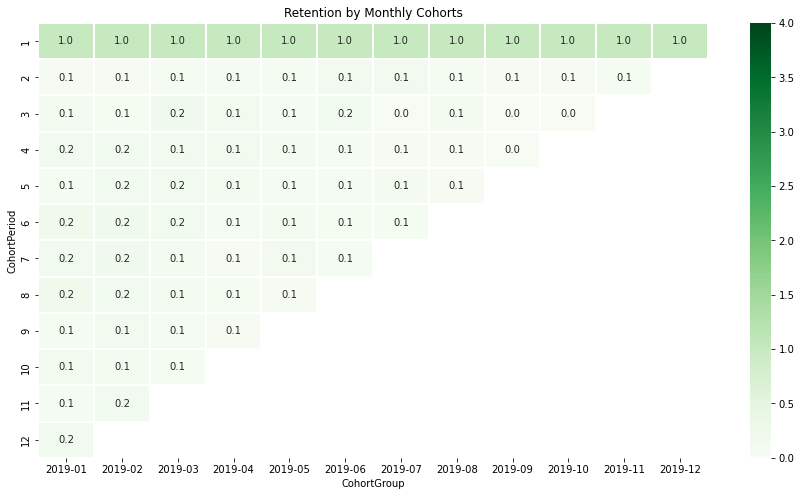

In [220]:
plt.figure(figsize=(15,8))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(data=cust_retention,
            annot = True,
            cmap = "Greens",
            vmin = 0.0,
            vmax = list(cust_retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3)

plt.savefig("Retention By Monthly Cohorts")
plt.show()